
📊 Model Accuracy: 100.00%

Enter flower measurements:


Petal length (cm):  2
Petal width (cm):  3
Stem thickness (cm):  1
Leaf size (cm):  5



🌸 Predicted flower type: Lotus
Daisy: 0.40
Lotus: 0.60
Rose: 0.00
Sunflower: 0.00


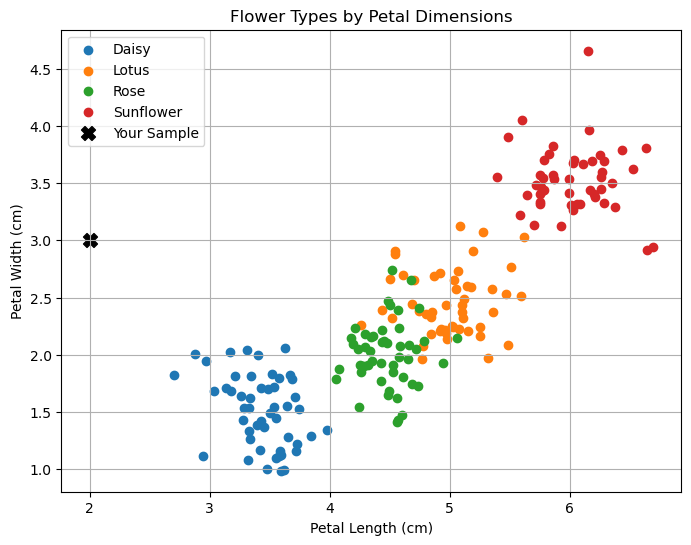

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 📥 Load your dataset
df = pd.read_csv('Desktop/23BK1A66L5/synthetic_flower_dataset.csv')


# 🎯 Separate features and labels
X = df[['PetalLength', 'PetalWidth', 'StemThickness', 'LeafSize']]
y = df['FlowerType']

# 🧠 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 📈 Evaluate model
y_pred = knn.predict(X_test)
print(f"\n📊 Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# 🌼 Take user input
print("\nEnter flower measurements:")
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))
stem_thickness = float(input("Stem thickness (cm): "))
leaf_size = float(input("Leaf size (cm): "))

# 🧪 Create input sample with correct feature names
sample = pd.DataFrame([[petal_length, petal_width, stem_thickness, leaf_size]],
                      columns=['PetalLength', 'PetalWidth', 'StemThickness', 'LeafSize'])

# 🔮 Make prediction
prediction = knn.predict(sample)
print(f"\n🌸 Predicted flower type: {prediction[0]}")

# 📊 Show class probabilities
probs = knn.predict_proba(sample)
for name, prob in zip(knn.classes_, probs[0]):
    print(f"{name}: {prob:.2f}")

# 📊 Visualize the dataset and the predicted sample
plt.figure(figsize=(8, 6))

# Plot training data by flower type
for flower in knn.classes_:
    subset = df[df['FlowerType'] == flower]
    plt.scatter(subset['PetalLength'], subset['PetalWidth'], label=flower)

# Plot the user input sample
plt.scatter(petal_length, petal_width, color='black', marker='X', s=100, label='Your Sample')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Flower Types by Petal Dimensions')
plt.legend()
plt.grid(True)
plt.show()
